In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
job_category = pd.read_csv('data/job_categoy.csv',header=0)
exp = pd.read_csv('data/movie_count_by_year.csv')

In [23]:
new_head = job_category.iloc[0]
job_category = job_category[2:]
job_category.columns = new_head
job_category.head()

,category,actor,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer
2,tt0000001,NaN,NaN,NaN,NaN,William Heise,NaN,William K.L. Dickson,NaN,NaN,NaN,Carmencita,NaN
3,tt0000002,NaN,NaN,NaN,NaN,NaN,Gaston Paulin,Émile Reynaud,NaN,NaN,NaN,NaN,NaN
4,tt0000003,NaN,NaN,NaN,NaN,NaN,Gaston Paulin,Émile Reynaud,Tamara Pappé,Julien Pappé,NaN,NaN,NaN
5,tt0000004,NaN,NaN,NaN,NaN,NaN,Gaston Paulin,Émile Reynaud,NaN,NaN,NaN,NaN,NaN
6,tt0000005,John Ott,NaN,NaN,NaN,NaN,NaN,William K.L. Dickson,NaN,Thomas A. Edison,NaN,NaN,NaN


In [24]:
job_category.columns = ['tconst','actor', 'actress', 'archive_footage', 'archive_sound',
       'cinematographer', 'composer', 'director', 'editor', 'producer',
       'production_designer', 'self', 'writer']

In [25]:
movie = pd.read_csv('data/title_basic/data.tsv', sep ='	')
movie = movie[movie['titleType'] =='movie']

movie = movie.replace('\\N', np.nan)

movie['startYear'] = movie['startYear'].fillna(0).astype('int')
movie = movie[movie.startYear >= 1970].dropna(subset=['runtimeMinutes'])

movie
cross = pd.read_csv('data/title_principals/data.tsv', sep ='	')
cross = cross[['tconst', 'nconst', 'category']]

rate = pd.read_csv('data/title_rating/data.tsv', sep ='	')

movie = pd.merge(rate, movie, on='tconst')
start_yr = pd.read_csv('data/title_basic/data.tsv', sep ='	')
start_yr = start_yr[['tconst','startYear', 'titleType']]
cate = pd.read_csv('data/title_principals/data.tsv', sep ='	')
cate = pd.merge(cate, start_yr, on='tconst')
cate = cate[['tconst','nconst','category', 'startYear', 'titleType']]
cate = cate.replace('\\N', np.nan)


movie

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0015724,6.2,20,movie,Dama de noche,Dama de noche,0,1993,NaN,102,"Drama,Mystery,Romance"
1,tt0016906,5.6,15,movie,Frivolinas,Frivolinas,0,2014,NaN,80,"Comedy,Musical"
2,tt0031458,7.1,8,movie,El huésped del sevillano,El huésped del sevillano,0,1970,NaN,86,Comedy
3,tt0035423,6.4,76787,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
4,tt0036606,6.5,247,movie,"Another Time, Another Place","Another Time, Another Place",0,1983,NaN,118,"Drama,War"
5,tt0038687,7.4,1450,movie,Let There Be Light,Let There Be Light,0,1980,NaN,58,"Documentary,War"
6,tt0039442,6.2,125,movie,"Habla, mudita","Habla, mudita",0,1973,NaN,88,Drama
7,tt0054724,3.5,1191,movie,I Eat Your Skin,Zombie,0,1971,NaN,92,Horror
8,tt0057461,4.4,14,movie,La rosa de los vientos,La rosa de los vientos,0,1983,NaN,84,NaN
9,tt0058950,6.9,123,movie,"Auliban, the Seller of Rings",Biya el-Khawatim,0,1973,NaN,95,"Comedy,Musical"


In [26]:

movie = pd.merge(cross, movie, on='tconst')

cate['startYear'] = cate['startYear'].fillna(0).astype('int')

cate = cate[(cate['category'].isin(['director','cinematographer','actor','actress','writer'])) & (cate['startYear'] > 1950)&(cate['startYear'] <= 2020)
           & (cate['titleType'] =='movie')].drop(columns='titleType')

collab = cate.groupby(['tconst', 'startYear', 'category'])['nconst'].max().unstack().groupby('director')['writer','cinematographer',
                                                                                               'actor','actress'].count()
collab.columns = ['writer_collab','cine_collab','actor_collab','actress_collab']
movie = pd.merge(movie, collab, how='left', left_on='nconst', right_index=True)

In [27]:
movie.head()

,tconst,nconst,category,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,writer_collab,cine_collab,actor_collab,actress_collab
0,tt0015724,nm1457911,editor,6.2,20,movie,Dama de noche,Dama de noche,0,1993,NaN,102,"Drama,Mystery,Romance",0.0,1.0,2.0,1.0
1,tt0015724,nm0844752,actor,6.2,20,movie,Dama de noche,Dama de noche,0,1993,NaN,102,"Drama,Mystery,Romance",NaN,NaN,NaN,NaN
2,tt0015724,nm0869732,actress,6.2,20,movie,Dama de noche,Dama de noche,0,1993,NaN,102,"Drama,Mystery,Romance",NaN,NaN,NaN,NaN
3,tt0015724,nm0194720,actor,6.2,20,movie,Dama de noche,Dama de noche,0,1993,NaN,102,"Drama,Mystery,Romance",NaN,NaN,NaN,NaN
4,tt0015724,nm0650495,actress,6.2,20,movie,Dama de noche,Dama de noche,0,1993,NaN,102,"Drama,Mystery,Romance",NaN,NaN,NaN,NaN


In [29]:
m = pd.read_csv('data/title_basic/data.tsv', sep ='	')
m = m[m['titleType'] =='movie']

m = m.replace('\\N', np.nan)

m['startYear'] = m['startYear'].fillna(0).astype('int')
m = m[m.startYear >= 1970].dropna(subset=['runtimeMinutes'])

m
cross = pd.read_csv('data/title_principals/data.tsv', sep ='	')
cross = cross[['tconst', 'nconst']]

rate2 = pd.read_csv('data/title_rating/data.tsv', sep ='	')

In [30]:
m = pd.merge(rate2, m, on='tconst')
m = pd.merge(cross, m, on='tconst')
res = []
for i in list(set(m.startYear)):
    weight = m[m.startYear <= i]
    weight['multiply'] = weight['averageRating']*weight['numVotes']
    mult = weight.groupby('nconst')['multiply'].sum()
    sum_votes = weight.groupby('nconst')['numVotes'].sum()
    weight = pd.merge(mult, sum_votes, right_index=True, left_index=True)
    weight['weight_avg'] = weight['multiply']/weight['numVotes']
    weight['startYear'] = i
    res.append(weight)
    

del m
del cross
del rate2

C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
res = pd.concat(res).reset_index()
movie = pd.merge(movie, res, on = ['nconst','startYear'])
movie.head()

,tconst,nconst,category,averageRating,numVotes_x,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,writer_collab,cine_collab,actor_collab,actress_collab,multiply,numVotes_y,weight_avg
0,tt0015724,nm1457911,editor,6.2,20,movie,Dama de noche,Dama de noche,0,1993,NaN,102,"Drama,Mystery,Romance",0.0,1.0,2.0,1.0,124.0,20,6.200000
1,tt0015724,nm0844752,actor,6.2,20,movie,Dama de noche,Dama de noche,0,1993,NaN,102,"Drama,Mystery,Romance",NaN,NaN,NaN,NaN,1054.3,189,5.578307
2,tt0015724,nm0869732,actress,6.2,20,movie,Dama de noche,Dama de noche,0,1993,NaN,102,"Drama,Mystery,Romance",NaN,NaN,NaN,NaN,479.2,68,7.047059
3,tt0015724,nm0194720,actor,6.2,20,movie,Dama de noche,Dama de noche,0,1993,NaN,102,"Drama,Mystery,Romance",NaN,NaN,NaN,NaN,124.0,20,6.200000
4,tt0015724,nm0650495,actress,6.2,20,movie,Dama de noche,Dama de noche,0,1993,NaN,102,"Drama,Mystery,Romance",NaN,NaN,NaN,NaN,124.0,20,6.200000


In [32]:
r = pd.read_csv('data/name_basic/data.tsv', sep ='	')
r = r[['nconst', 'primaryName']]
movie = pd.merge(movie, r, on = 'nconst')
movie.head()

,tconst,nconst,category,averageRating,numVotes_x,titleType,primaryTitle,originalTitle,isAdult,startYear,...,runtimeMinutes,genres,writer_collab,cine_collab,actor_collab,actress_collab,multiply,numVotes_y,weight_avg,primaryName
0,tt0015724,nm1457911,editor,6.2,20,movie,Dama de noche,Dama de noche,0,1993,...,102,"Drama,Mystery,Romance",0.0,1.0,2.0,1.0,124.0,20,6.200000,Hubert Barrero
1,tt0365967,nm1457911,writer,6.6,259,movie,Zurdo,Zurdo,0,2003,...,110,"Adventure,Fantasy",0.0,1.0,2.0,1.0,1833.4,279,6.571326,Hubert Barrero
2,tt1562873,nm1457911,writer,4.8,592,movie,Suave patria,Suave patria,0,2012,...,92,"Comedy,Crime",0.0,1.0,2.0,1.0,4675.0,871,5.367394,Hubert Barrero
3,tt0015724,nm0844752,actor,6.2,20,movie,Dama de noche,Dama de noche,0,1993,...,102,"Drama,Mystery,Romance",NaN,NaN,NaN,NaN,1054.3,189,5.578307,Rafael Sánchez Navarro
4,tt0085314,nm0844752,actor,5.5,39,movie,Demon Hunter,Cazador de demonios,0,1983,...,93,Horror,NaN,NaN,NaN,NaN,214.5,39,5.500000,Rafael Sánchez Navarro


In [116]:
movie = movie[movie.category == 'director']
act = movie[['primaryName','weight_avg', 'numVotes_y']]
#act = act.groupby(['primaryName'])['weight_avg'].agg({'weight_avg': 'max', 'numVotes_y': 'sum'}).reset_index()

In [117]:
act = act.drop_duplicates(subset=['primaryName', 'weight_avg', 'numVotes_y'], keep=False)
pop_director = act[['primaryName', 'numVotes_y']].groupby(['primaryName'])['numVotes_y'].sum().reset_index().nlargest(10, 'numVotes_y')
pop_director.columns = ['Director Name', 'Total Votes']
#plt.bar(pop_director['Director Name'], pop_director['Total Votes']);
#pop_director

,Director Name,Total Votes
65885,Steven Spielberg,118211189
55914,Quentin Tarantino,71648170
21811,Francis Ford Coppola,57633755
54555,Peter Jackson,52834301
59705,Ron Howard,41960360
68351,Tim Burton,40915412
72642,Woody Allen,39557665
15685,David Fincher,39337633
46918,Michael Bay,39273232
41658,Luc Besson,37942797


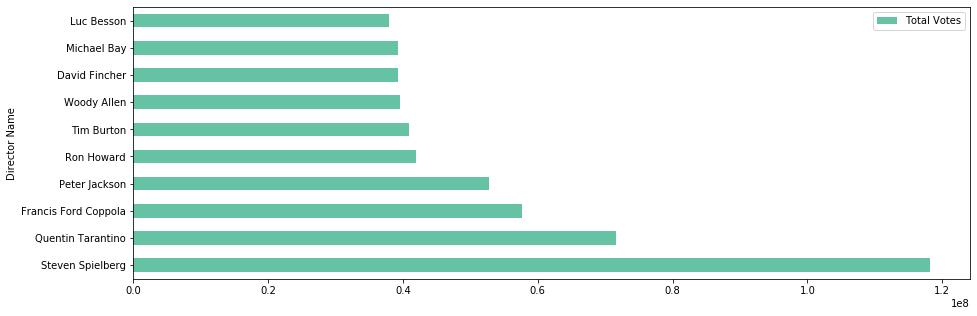

In [118]:
f, ax = plt.subplots(figsize=(15, 5))
pal = sns.color_palette("Set2", 13)
pop_director.set_index(keys='Director Name').plot(kind='barh',ax=ax, color=pal);
pop_director


In [119]:
l = act[['primaryName', 'weight_avg']].groupby(['primaryName'])['weight_avg'].max().reset_index()
pop_director.info()
pop_director = pd.concat([pop_director, l], axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 65885 to 41658
Data columns (total 2 columns):
Director Name    10 non-null object
Total Votes      10 non-null int64
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


,Director Name,Total Votes,primaryName,weight_avg
15685,David Fincher,39337633.0,David Fincher,8.474382
21811,Francis Ford Coppola,57633755.0,Francis Ford Coppola,9.127106
41658,Luc Besson,37942797.0,Luc Besson,8.309292
46918,Michael Bay,39273232.0,Michael Bay,7.184552
54555,Peter Jackson,52834301.0,Peter Jackson,8.706782
55914,Quentin Tarantino,71648170.0,Quentin Tarantino,8.546898
59705,Ron Howard,41960360.0,Ron Howard,7.435536
65885,Steven Spielberg,118211189.0,Steven Spielberg,8.115559
68351,Tim Burton,40915412.0,Tim Burton,7.641019
72642,Woody Allen,39557665.0,Woody Allen,7.686015


,Director Name,weight_avg
15685,David Fincher,8.474382
21811,Francis Ford Coppola,9.127106
41658,Luc Besson,8.309292
46918,Michael Bay,7.184552
54555,Peter Jackson,8.706782
55914,Quentin Tarantino,8.546898
59705,Ron Howard,7.435536
65885,Steven Spielberg,8.115559
68351,Tim Burton,7.641019
72642,Woody Allen,7.686015


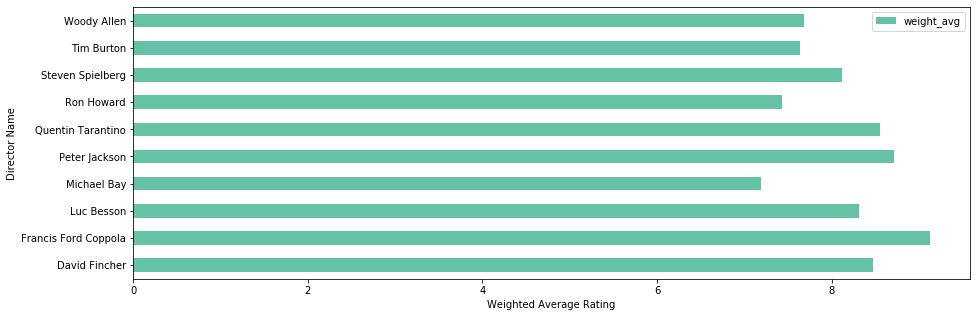

In [133]:
pop_director = pop_director.dropna()
pop_director = pop_director[['Director Name', 'weight_avg']]
f, ax = plt.subplots(figsize=(15, 5))
pal = sns.color_palette("Set2", 10)
pop_director.set_index(keys='Director Name').plot(kind='barh',ax=ax, color=pal)
plt.xlabel('Weighted Average Rating');
pop_director

In [ ]:
c = pd.read_csv('data/movie_count_by_year.csv').groupby(['nconst','startYear','category'])['tconst'].max().unstack()


movie = pd.merge(cross, movie, on='tconst')
movie = pd.merge(movie, c, left_on=['nconst', 'startYear'], right_index=True)
movie.head()

In [ ]:
movie = movie[['tconst', 'averageRating', 'numVotes', 'runtimeMinutes','startYear','genres', 'actor', 'actress', 'cinematographer',
       'director', 'writer']].groupby(['tconst', 'averageRating', 'numVotes', 'runtimeMinutes','startYear','genres'])['actor', 'actress', 'cinematographer',
       'director', 'writer'].max().reset_index()
#movie = pd.concat([cnts, pd.get_dummies(cnts.genres, prefix_sep=',')], axis=1).drop(columns=['genres', 'tconst','startYear']).fillna(0)
movie

In [ ]:

job = pd.merge(g, names, on = 'nconst').drop(columns='nconst').replace('.', '').replace(' ', '')
job = job.pivot_table(index=['tconst','category'], values='primaryName', aggfunc='max')
job

In [ ]:
job.unstack().to_csv('data/job_categoy.csv')

In [ ]:
names = pd.read_csv('data/title_basic/data.tsv', sep ='	')
names = names[names['titleType']=='movie']

In [ ]:
rate = pd.read_csv('data/title_rating/data.tsv', sep ='	')
n = pd.merge(names, rate, how='left', on='tconst')
n.head()

In [ ]:
n = n[pd.isnull(n.averageRating) == True].replace('\\N', np.nan)

In [ ]:
m = pd.read_csv('data/title_basic/data.tsv', sep ='	')

In [ ]:
m = pd.read_csv('data/title_basic/data.tsv', sep ='	')
director = pd.read_csv('data/title_principals/data.tsv', sep ='	')
director = director[director['category'] == 'director']
director = pd.merge(director, m, on = 'tconst')
director = director.groupby(['nconst','genres'])['tconst'].count()


In [ ]:
director = pd.merge(director, m, on = 'tconst')


In [ ]:
#director = director[director['titleType'] == 'movie']
director.groupby(['nconst','genres'])['tconst'].count()

In [ ]:
#pd.read_csv('data/title_principals/data.tsv', sep ='	')